In [1]:
import pandas as pd
import numpy as np

from utiles import *

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Data

In [2]:
loader = DataHandler("data")
loader.load_all()
all_data = loader.get_all()
features_names = all_data.columns.get_values()

In [3]:
clase = "sudan 4 - 2,5%"
# clase = "sudan 4 - 1%"
sudan_data = loader.get_data(clase)
sudan_mean = sudan_data.mean()

In [4]:
target = np.where(all_data['clase']==clase, 0, 1)

In [5]:
clases = [ "sudan 1 - 1%", "sudan 1 - 2,5%", "sudan 1 - 5%", "sudan 2 - 1%", "sudan 2 - 2,5%", "sudan 2 - 5%", 
                "sudan 3 - 5%", "sudan 4 - 1%", "sudan 4 - 2,5%", "sudan 4 - 5%"]

In [6]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
st_data = std.fit_transform(all_data.iloc[:,:-1])

In [7]:
from sklearn.decomposition import KernelPCA, RandomizedPCA
from sklearn.model_selection import train_test_split, cross_val_score

pca = KernelPCA(random_state=15, kernel="linear", n_jobs=-1)
# tr_data = pca.fit_transform(st_data)

# X_train, x_test, Y_train, y_test = train_test_split(tr_data, target, test_size=.25)
X_train, x_test, Y_train, y_test = train_test_split(st_data, target, test_size=.25)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV

def get_features(X, Y, model=None, n_features=20):
    if not model:
#         model = LogisticRegression(class_weight="balanced", n_jobs=-1)
#         model = DecisionTreeRegressor(random_state=15)
        model = RandomForestRegressor(random_state=15, n_estimators=20, n_jobs=-1, max_depth=3)

    rfe = RFE(model, n_features, step=30)
#     rfe = rfe.fit(X_train, Y_train)
    rfe = rfe.fit(X, Y)
    indices = np.where(rfe.support_)            # Mask of selected features
    return indices

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer

def predict(X_train, Y_train, x_test, y_test, clase, target, raw_data, depth=6, estimators=20):
    clf = RandomForestClassifier(max_depth=depth, n_jobs=4, n_estimators=estimators, criterion="entropy",
                                 min_samples_leaf=5, max_features="auto", class_weight="balanced") #"balanced_subsample")

    clf.fit(X_train, Y_train)

    predicted = clf.predict( x_test )

    cm = confusion_matrix(y_pred=predicted, y_true=y_test)
    plot_confusion_matrix(classes=[clase, "Otros"], cm=cm, norm=True, title="Prb. {}".format(clase))#, size=(6, 6))
    kappa_ = make_scorer(cohen_kappa_score)

    val = cross_val_score(estimator=clf, X=raw_data, y=target, n_jobs=4, scoring=kappa_, cv=4)
    m, s = np.round(np.mean(val), 2), np.round(np.std(val), 2)
    print("{} results:".format( clf.__str__().split("(")[0] ) )
    print("CV results: {}".format(val))
    print("Mean: {}\t Standard deviation: {}".format(m, s))
    print("C-K value matriz actual: {}".format(cohen_kappa_score(y_test, predicted)))


#################	 sudan 1 - 1% 	#####################
Frecuencias a utilizar: [4119.272 4366.121 4674.68 4852.102 7062.161 7066.018 7170.156999999999
 8473.822 8693.671 8948.232]
Resultados sin PCA


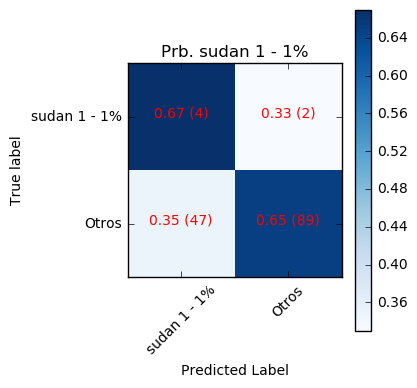

RandomForestClassifier results:
CV results: [ 0.05114668  0.0762383   0.18234536  0.08733704]
Mean: 0.1	 Standard deviation: 0.05
C-K value matriz actual: 0.07003475006682691
******************************************************************************
con PCA


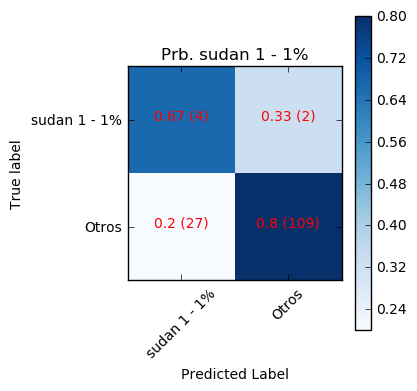

RandomForestClassifier results:
CV results: [ 0.06743776  0.18667014  0.60393258  0.37022333]
Mean: 0.31	 Standard deviation: 0.2
C-K value matriz actual: 0.15649324047521518

#################	 sudan 1 - 2,5% 	#####################
Frecuencias a utilizar: [4069.132 4389.263 4994.811 5025.667 5029.524 5199.232 5206.946
 5249.3730000000005 5253.229 9978.051]
Resultados sin PCA


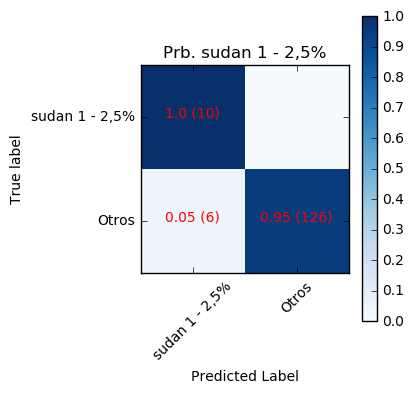

RandomForestClassifier results:
CV results: [ 0.89256198  0.19151376  0.51522593  1.        ]
Mean: 0.65	 Standard deviation: 0.32
C-K value matriz actual: 0.7473309608540926
******************************************************************************
con PCA


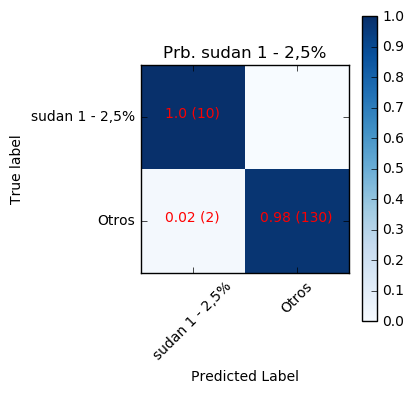

RandomForestClassifier results:
CV results: [ 0.89256198  0.41168289  0.74716079  1.        ]
Mean: 0.76	 Standard deviation: 0.22
C-K value matriz actual: 0.9015256588072122

#################	 sudan 1 - 5% 	#####################
Frecuencias a utilizar: [4065.275 4069.132 4080.703 4088.417 4138.558 4339.122 4366.121 4794.247
 5511.648 6703.46]
Resultados sin PCA


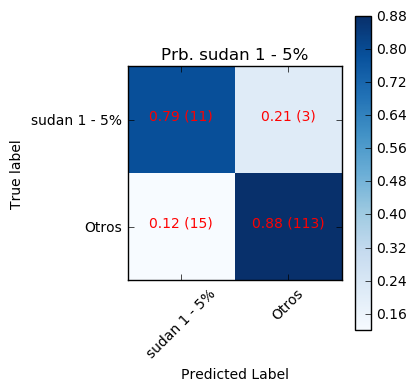

RandomForestClassifier results:
CV results: [ 0.94858798  0.23951205  0.34758468  0.88141295]
Mean: 0.6	 Standard deviation: 0.31
C-K value matriz actual: 0.48384491114701134
******************************************************************************
con PCA


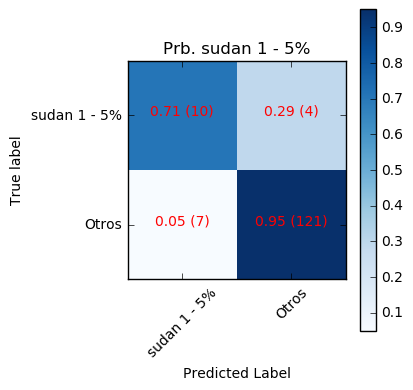

RandomForestClassifier results:
CV results: [ 0.89250568  0.28095394  0.69395349  0.94855892]
Mean: 0.7	 Standard deviation: 0.26
C-K value matriz actual: 0.6021395822720326

#################	 sudan 2 - 1% 	#####################
Frecuencias a utilizar: [4065.275 4431.689 4447.117 5226.23 5230.088 5245.516 6252.191999999999
 6279.191 7027.448 9623.207]
Resultados sin PCA


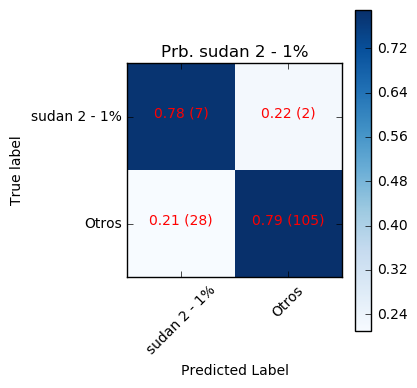

RandomForestClassifier results:
CV results: [ 0.09402283  0.37216455  0.53703028  0.05539446]
Mean: 0.26	 Standard deviation: 0.2
C-K value matriz actual: 0.24172303310786758
******************************************************************************
con PCA


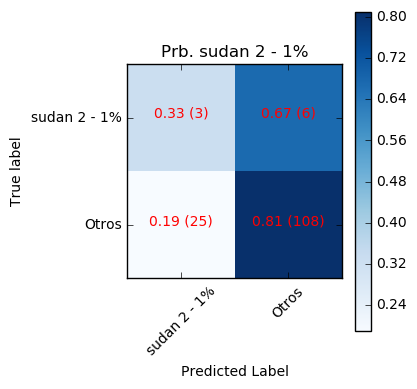

RandomForestClassifier results:
CV results: [ 0.10225399  0.43017657  0.5101737   0.08864266]
Mean: 0.28	 Standard deviation: 0.19
C-K value matriz actual: 0.07326315789473681

#################	 sudan 2 - 2,5% 	#####################
Frecuencias a utilizar: [4011.277 4022.848 4366.121 5083.522 5098.95 5118.235 5137.52 5179.947
 5214.66 5419.081]
Resultados sin PCA


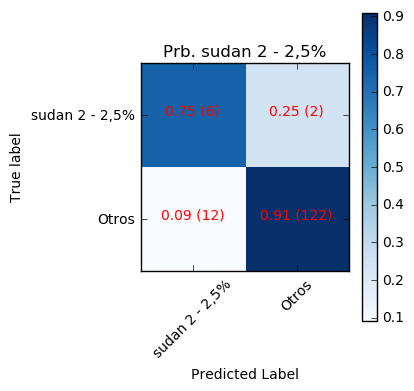

RandomForestClassifier results:
CV results: [ 0.16431262  0.23879142  0.46183206  0.08465334]
Mean: 0.24	 Standard deviation: 0.14
C-K value matriz actual: 0.41598119858989435
******************************************************************************
con PCA


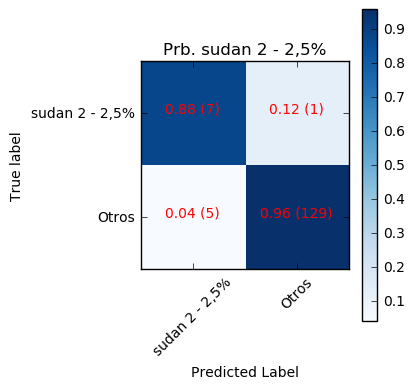

RandomForestClassifier results:
CV results: [ 0.81841432  0.26935123  0.80293501  0.83073229]
Mean: 0.68	 Standard deviation: 0.24
C-K value matriz actual: 0.6782477341389728

#################	 sudan 2 - 5% 	#####################
Frecuencias a utilizar: [4045.99 4342.979 5187.661 5245.516 5253.229 5260.944 5264.8009999999995
 7139.3009999999995 7231.869000000001 9966.479]
Resultados sin PCA


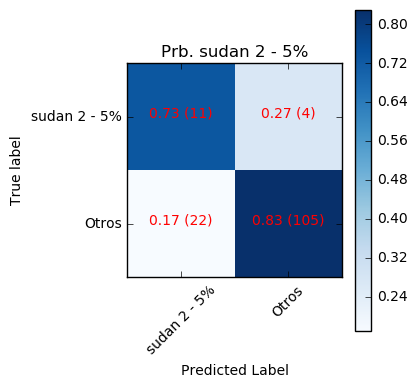

RandomForestClassifier results:
CV results: [ 0.22588762  0.81266491  0.35933359  0.30746562]
Mean: 0.43	 Standard deviation: 0.23
C-K value matriz actual: 0.3662890490902849
******************************************************************************
con PCA


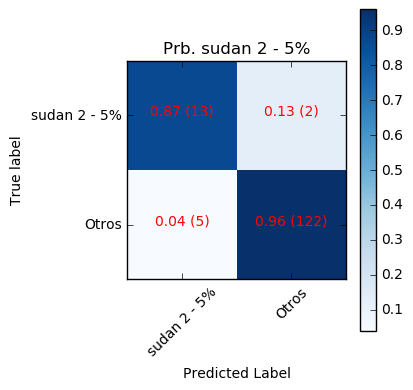

RandomForestClassifier results:
CV results: [ 0.57888493  0.60610264  0.78139535  0.85819645]
Mean: 0.71	 Standard deviation: 0.12
C-K value matriz actual: 0.7602508441871684

#################	 sudan 3 - 5% 	#####################
Frecuencias a utilizar: [4663.109 4790.39 5014.096 5326.513000000001 5947.4890000000005 5986.059
 6001.486999999999 6013.058000000001 6024.629 9187.366]
Resultados sin PCA


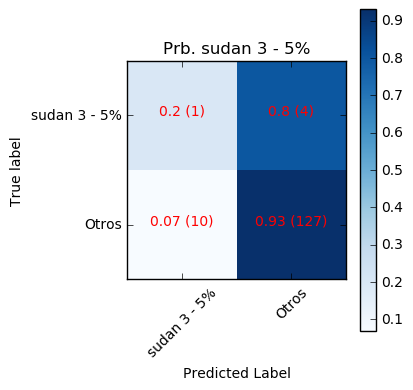

RandomForestClassifier results:
CV results: [ 0.15587847  0.83081811  0.21109935  0.66288105]
Mean: 0.47	 Standard deviation: 0.29
C-K value matriz actual: 0.08048103607770585
******************************************************************************
con PCA


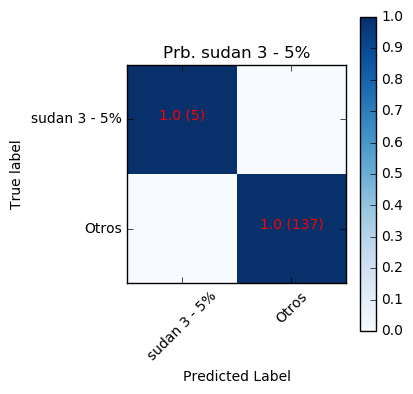

RandomForestClassifier results:
CV results: [ 1.          1.          0.94855892  0.94357743]
Mean: 0.97	 Standard deviation: 0.03
C-K value matriz actual: 1.0

#################	 sudan 4 - 1% 	#####################
Frecuencias a utilizar: [4080.703 4107.702 4447.117 5376.654 5411.366999999999 5677.5 5773.924
 5812.494000000001 5920.49 9306.933]
Resultados sin PCA


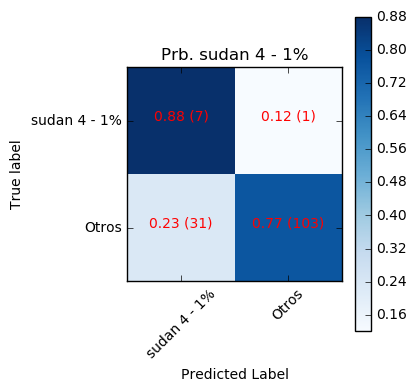

RandomForestClassifier results:
CV results: [ 0.18431568  0.28398548  0.60587002  0.08236086]
Mean: 0.29	 Standard deviation: 0.2
C-K value matriz actual: 0.23295070898041859
******************************************************************************
con PCA


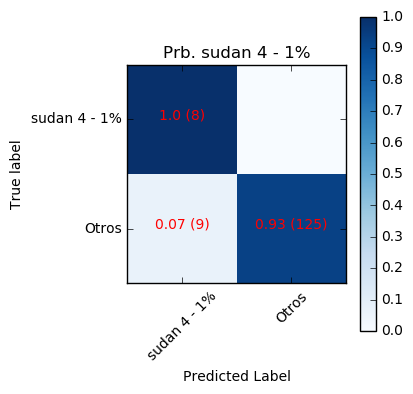

RandomForestClassifier results:
CV results: [ 0.23265074  0.26297578  0.83073229  0.1186597 ]
Mean: 0.36	 Standard deviation: 0.28
C-K value matriz actual: 0.6101281269066503

#################	 sudan 4 - 2,5% 	#####################
Frecuencias a utilizar: [4080.703 4134.701 4389.263 5245.516 5353.512 5368.939 6090.198 6954.165
 7775.706 8682.1]
Resultados sin PCA


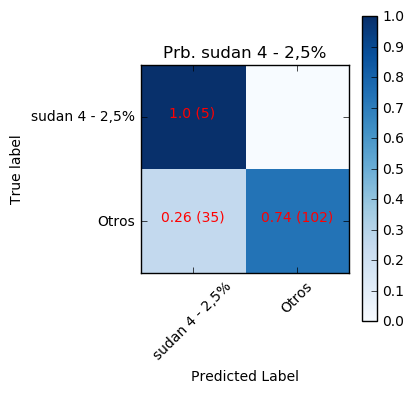

RandomForestClassifier results:
CV results: [ 0.03794038  0.19599303  0.43162791  0.02932177]
Mean: 0.17	 Standard deviation: 0.16
C-K value matriz actual: 0.1702838063439065
******************************************************************************
con PCA


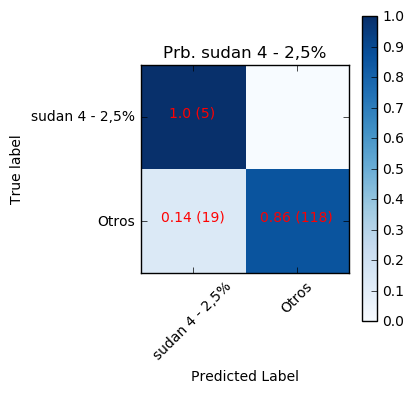

RandomForestClassifier results:
CV results: [ 0.16930489  0.40915395  0.49219688  0.13434453]
Mean: 0.3	 Standard deviation: 0.15
C-K value matriz actual: 0.30428055698813816

#################	 sudan 4 - 5% 	#####################
Frecuencias a utilizar: [4080.703 4246.554 4956.241 4963.955 5226.23 5989.916 5993.773 7339.865
 8790.096 8793.952]
Resultados sin PCA


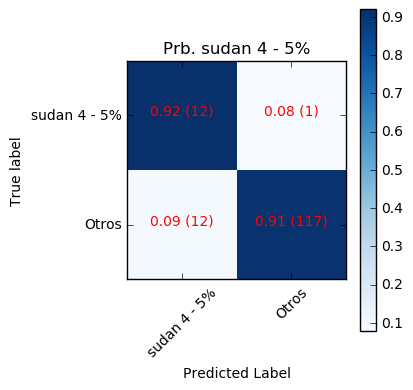

RandomForestClassifier results:
CV results: [ 0.38503937  0.60524226  0.30594472  0.66288105]
Mean: 0.49	 Standard deviation: 0.15
C-K value matriz actual: 0.6012958963282937
******************************************************************************
con PCA


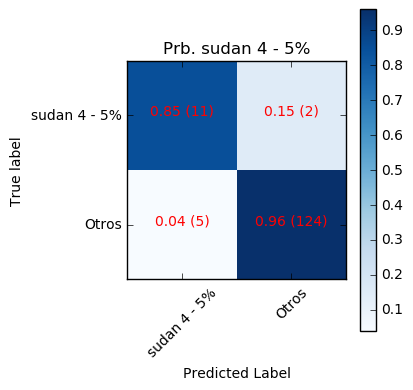

RandomForestClassifier results:
CV results: [ 0.63682864  0.71803018  0.66288105  0.83073229]
Mean: 0.71	 Standard deviation: 0.07
C-K value matriz actual: 0.731496488384657


In [10]:
from sklearn.decomposition import PCA

for c in clases:
    tar = np.where(all_data["clase"]==c, 0, 1)
    X_train, x_test, Y_train, y_test = train_test_split(st_data, tar, test_size=.25)
    indices = get_features(X_train, Y_train, n_features=10)
    print("\n#################\t {} \t#####################".format(c))
    print("Frecuencias a utilizar: {}".format( features_names[indices[0]] ))
    
    print("Resultados sin PCA")
    predict(X_train[:,indices[0]], Y_train, x_test[:,indices[0]], y_test, c, tar, st_data[:,indices[0]],
                depth=3, estimators=20) 
    
    pca = PCA(svd_solver="randomized", random_state=15)

    new_data = pca.fit_transform( st_data[:, indices[0]] )
    X_train = pca.transform(X_train[:,indices[0]])
    x_test = pca.transform(x_test[:,indices[0]])
    print("******************************************************************************") 
    print("con PCA")
    predict(X_train, Y_train, x_test, y_test, c, tar, new_data, depth=3, estimators=20)   


##############################################
Frecuencias a utilizar: [4049.847 4435.545999999999 4516.543 4643.8240000000005 4855.959 4952.384
 5245.516 5924.347 6468.184 6742.03]
##############################################

sin PCA


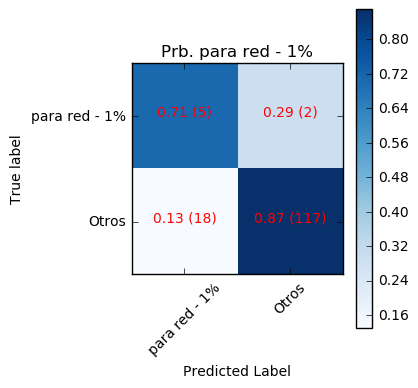

RandomForestClassifier results:
CV results: [ 0.27032077  0.21882641  0.94357743  0.25751656]
Mean: 0.42	 Standard deviation: 0.3
C-K value matriz actual: 0.2788217369222956
******************************************************************************
con PCA


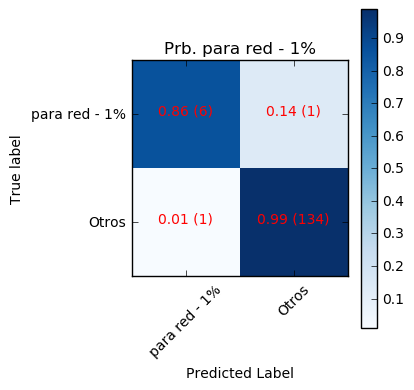

RandomForestClassifier results:
CV results: [ 0.76293823  0.68584071  0.88141295  0.66912504]
Mean: 0.75	 Standard deviation: 0.08
C-K value matriz actual: 0.8497354497354497

##############################################
Frecuencias a utilizar: [4308.266 4670.823 4678.537 4782.6759999999995 4798.104 4882.958 5214.66
 5889.634 5916.633000000001 6283.048000000001]
##############################################

sin PCA


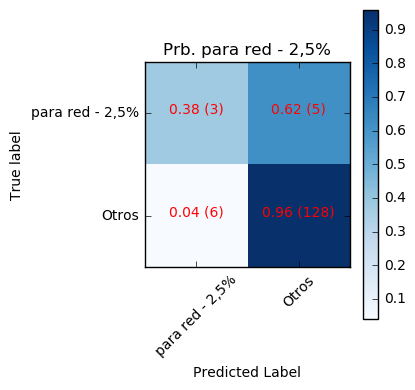

RandomForestClassifier results:
CV results: [ 0.43017657  0.39642058  0.26877114  0.27808   ]
Mean: 0.34	 Standard deviation: 0.07
C-K value matriz actual: 0.3118942731277533
******************************************************************************
con PCA


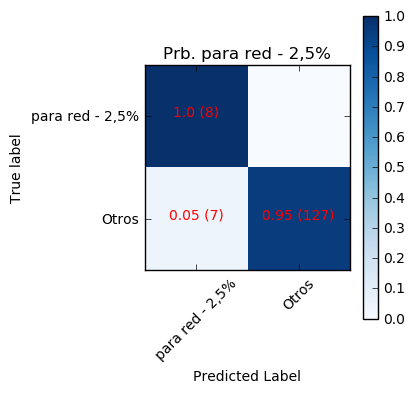

RandomForestClassifier results:
CV results: [ 1.          0.89242424  0.4429324   0.39804838]
Mean: 0.68	 Standard deviation: 0.27
C-K value matriz actual: 0.6715135492399207

##############################################
Frecuencias a utilizar: [4528.1140000000005 4539.686 4697.822 5932.061 5970.630999999999 6036.2
 6055.485 6097.911999999999 6703.46 7073.732]
##############################################

sin PCA


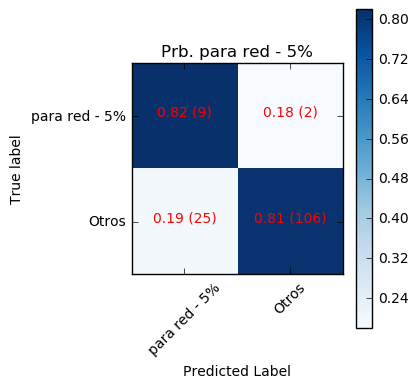

RandomForestClassifier results:
CV results: [ 0.30653644  0.60408922  0.11253776  0.5048288 ]
Mean: 0.38	 Standard deviation: 0.19
C-K value matriz actual: 0.3204537398085785
******************************************************************************
con PCA


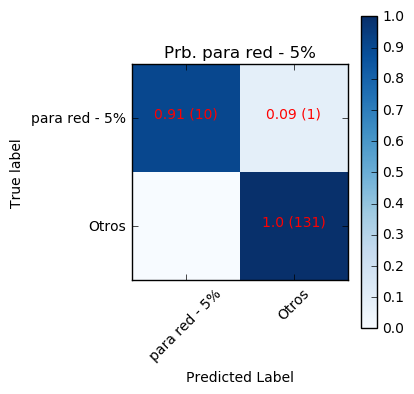

RandomForestClassifier results:
CV results: [ 1.          1.          0.81258307  0.48749198]
Mean: 0.83	 Standard deviation: 0.21
C-K value matriz actual: 0.9485879797248371


In [11]:
clases_parared = ["para red - 1%", "para red - 2,5%", "para red - 5%"]

for c in clases_parared:
    tar = np.where(all_data["clase"]==c, 0, 1)
    X_train, x_test, Y_train, y_test = train_test_split(st_data, tar, test_size=.25)
    indices = get_features(X_train, Y_train, n_features=10)
    print("\n##############################################")
    print("Frecuencias a utilizar: {}".format( features_names[indices[0]] ))
    print("##############################################\n")
    print("sin PCA")
    predict(X_train[:,indices[0]], Y_train, x_test[:,indices[0]], y_test, c, tar, st_data[:,indices[0]], depth=3, estimators=20) 
    
    pca = PCA(svd_solver="randomized", random_state=15)
    new_data = pca.fit_transform( st_data[:, indices[0]] )
    X_train = pca.transform(X_train[:,indices[0]])
    x_test = pca.transform(x_test[:,indices[0]])
    print("******************************************************************************") 
    print("con PCA")
    predict(X_train, Y_train, x_test, y_test, c, tar, new_data, depth=3, estimators=20)   